In [134]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer
from sklearn.cluster import DBSCAN

In [2]:
raw_data = pd.read_csv('data_900_clean.csv')

In [3]:
reviews = pd.read_csv('reviewsdata.csv')


In [16]:
review_string=raw_data['reviews'].iloc[0]
reviews = review_string.split('[')
actual_reviews=[]
print(reviews)
for i in reviews:
    # print(len(i))
    if(len(i)>5):
        actual_reviews.append(i)
for i in actual_reviews:
    print(len(i))

['', '', '1, "We came in contact with doctor when I had a brain stroke and was unconsious at home in the year 2014. Upon tests it was found that I had a condition of aneurysm. I was lucky to get treated by Dr Manish Chugh as it was a complex procedure and he handled it perfectly. He was very clear in his approach and informed family about the procedure to be performed. He did coiling in the brain and after 15-20 days of stay in the hospital, I was discharged and am fine since then. He\'s such a wonderful doctor and a great human being. He\'s always available for his patients even over phone, or in SGRH. I never had to get anything else done since then, but was in touch with him for regular check-ups. I strongly recommend him for any and all such problems."], ', '1, "My nephew Daman Deep Singh, aged 24 yrs. met with an accident on 27th June, 2022.  He was in Medanta (someone got him admitted there after the  accident).  We were not satisfied with the way Medanta was handling things, so 

In [38]:
doctor_review_number_mapping={}

In [39]:
actual_reviews=[]
for i in range(len(raw_data)):
    review_string=raw_data['reviews'].iloc[i]
    reviews = review_string.split('[')
    # print(reviews)
    count=0
    for k in reviews:
        # print(len(i))
        if(len(k)>5):
            count+=1
            actual_reviews.append(k)
    doctor_review_number_mapping[i]=count
    print(i,count)
print((len(actual_reviews)))
reviews_df = pd.DataFrame(data=actual_reviews)
reviews_df.to_csv('reviewsdata.csv')

0 2
1 10
2 8
3 2
4 3
5 10
6 3
7 3
8 10
9 3
10 8
11 6
12 5
13 3
14 6
15 6
16 1
17 2
18 7
19 10
20 2
21 2
22 10
23 9
24 10
25 1
26 9
27 1
28 7
29 6
30 2
31 6
32 10
33 4
34 10
35 1
36 10
37 10
38 3
39 1
40 10
41 10
42 10
43 10
44 9
45 7
46 9
47 10
48 9
49 7
50 2
51 3
52 9
53 1
54 3
55 2
56 10
57 5
58 2
59 9
60 9
61 10
62 8
63 10
64 9
65 10
66 8
67 6
68 4
69 10
70 10
71 9
72 10
73 9
74 10
75 7
76 8
77 3
78 9
79 4
80 1
81 5
82 9
83 7
84 9
85 1
86 1
87 8
88 6
89 3
90 4
91 7
92 1
93 9
94 7
95 4
96 1
97 4
98 1
99 10
100 8
101 10
102 9
103 9
104 10
105 1
106 4
107 8
108 3
109 9
110 7
111 1
112 8
113 8
114 4
115 2
116 10
117 9
118 9
119 9
120 9
121 8
122 9
123 1
124 9
125 10
126 3
127 3
128 8
129 2
130 4
131 2
132 2
133 1
134 1
135 1
136 9
137 1
138 9
139 10
140 9
141 10
142 10
143 10
144 10
145 10
146 7
147 10
148 8
149 10
150 10
151 8
152 2
153 4
154 10
155 9
156 10
157 9
158 10
159 3
160 9
161 10
162 7
163 1
164 10
165 3
166 8
167 2
168 4
169 5
170 3
171 1
172 3
173 8
174 8
175 2
176 10
177 4

In [40]:
print(doctor_review_number_mapping)

{0: 2, 1: 10, 2: 8, 3: 2, 4: 3, 5: 10, 6: 3, 7: 3, 8: 10, 9: 3, 10: 8, 11: 6, 12: 5, 13: 3, 14: 6, 15: 6, 16: 1, 17: 2, 18: 7, 19: 10, 20: 2, 21: 2, 22: 10, 23: 9, 24: 10, 25: 1, 26: 9, 27: 1, 28: 7, 29: 6, 30: 2, 31: 6, 32: 10, 33: 4, 34: 10, 35: 1, 36: 10, 37: 10, 38: 3, 39: 1, 40: 10, 41: 10, 42: 10, 43: 10, 44: 9, 45: 7, 46: 9, 47: 10, 48: 9, 49: 7, 50: 2, 51: 3, 52: 9, 53: 1, 54: 3, 55: 2, 56: 10, 57: 5, 58: 2, 59: 9, 60: 9, 61: 10, 62: 8, 63: 10, 64: 9, 65: 10, 66: 8, 67: 6, 68: 4, 69: 10, 70: 10, 71: 9, 72: 10, 73: 9, 74: 10, 75: 7, 76: 8, 77: 3, 78: 9, 79: 4, 80: 1, 81: 5, 82: 9, 83: 7, 84: 9, 85: 1, 86: 1, 87: 8, 88: 6, 89: 3, 90: 4, 91: 7, 92: 1, 93: 9, 94: 7, 95: 4, 96: 1, 97: 4, 98: 1, 99: 10, 100: 8, 101: 10, 102: 9, 103: 9, 104: 10, 105: 1, 106: 4, 107: 8, 108: 3, 109: 9, 110: 7, 111: 1, 112: 8, 113: 8, 114: 4, 115: 2, 116: 10, 117: 9, 118: 9, 119: 9, 120: 9, 121: 8, 122: 9, 123: 1, 124: 9, 125: 10, 126: 3, 127: 3, 128: 8, 129: 2, 130: 4, 131: 2, 132: 2, 133: 1, 134: 1, 1

In [36]:
sentiment_score=[]
for i in actual_reviews:
    res = TextBlob(i)
    print(res.sentiment.polarity)


0.32410256410256405
0.27307692307692305
0.6625000000000001
0.475
0.5377777777777778
0.5
0.495
0.0
0.575
0.36428571428571427
-0.15000000000000002
-0.1
0.23376623376623376
0.4891666666666667
0.0625
0.21727272727272728
0.15
0.08907407407407408
0.0
0.40277777777777785
0.4666666666666666
0.4325
-0.03749999999999999
0.2
-0.059375
0.3275
0.5
0.10000000000000002
0.04375000000000001
0.292
0.2875
0.39
0.4325
0.3416666666666666
0.31666666666666665
0.0
1.0
0.03712121212121212
0.321875
-0.4
0.4703787878787879
0.3632154882154882
0.14583333333333334
0.4
0.2625
0.381
0.18
0.30000000000000004
0.6
0.11607142857142858
0.6
-0.6999999999999998
0.24363636363636365
0.5910714285714286
0.4133333333333334
0.3277777777777778
0.415
0.1325
0.10833333333333335
0.3875
0.51875
0.47833333333333344
0.26666666666666666
0.278125
0.13636363636363635
0.5978571428571429
0.7324999999999999
0.44375000000000003
0.75
0.3125
-0.14741269841269836
0.33333333333333337
0.64375
0.033333333333333326
0.575
0.0625
0.09464285714285714
0.

In [45]:
sentiment_score=[]
sid_obj= SentimentIntensityAnalyzer()
for i in actual_reviews:
    sentiment_score.append(sid_obj.polarity_scores(i)['compound'])
    # print(sid_obj.polarity_scores(i)['compound']) 

0.9021
0.9822
0.9412
0.967
0.7346
0.6249
0.8795
0.34
0.8588
0.9108
0.4336
-0.296
0.9649
0.8655
0.5601
0.7713
0.2023
0.3612
0.7269
0.9406
0.0516
0.6597
-0.8893
0.7506
-0.6416
0.8791
0.7836
-0.0428
0.6478
0.6997
0.0498
0.4754
0.7425
0.69
0.6249
0.5106
0.9076
0.7579
0.8923
-0.7766
0.9652
0.841
0.8085
-0.1531
0.764
0.8294
0.6649
0.8251
0.93
0.8221
0.8932
-0.7906
0.6361
0.4201
0.8777
0.9521
-0.0352
0.3321
0.9623
0.8957
0.8828
0.9342
0.899
0.7939
0.4019
0.0754
0.8354
0.5413
0.9413
0.908
0.5149
0.9463
0.5413
-0.3818
0.6297
0.3384
0.6301
0.7661
0.3612
0.9134
0.7424
0.958
0.5686
0.9147
-0.0464
0.5719
0.4378
0.2484
0.9773
0.8173
0.3369
0.9234
-0.1045
-0.8691
-0.6115
-0.079
0.0
0.762
0.7003
0.5719
0.6801
0.9577
0.8977
0.5367
0.762
0.7688
0.4728
0.6808
0.4754
-0.2023
0.4404
0.5367
0.0
-0.2263
0.9223
0.9118
0.9136
0.836
0.7964
0.7906
0.1531
0.8555
0.979
0.7837
0.9543
0.4877
0.3612
0.8051
0.9906
-0.0352
0.8982
0.9641
0.9604
0.5994
0.0608
0.8399
0.8351
0.8204
-0.3612
-0.8591
-0.8438
-0.3421
-0.6659
0

In [57]:
pointer1=0
pointer2=0
final_sentiments=[]
for k in doctor_review_number_mapping:
    pointer2=pointer1+doctor_review_number_mapping[k]
    print(pointer1,pointer2)
    sentiment_avg=0
    for i in range(pointer1,pointer2):
        # print(k,sentiment_avg)
        sentiment_avg+=sentiment_score[i] 
    sentiment_avg= sentiment_avg/(pointer2-pointer1)
    final_sentiments.append(sentiment_avg)
    pointer1=pointer2
print(len(final_sentiments))

0 2
2 12
12 20
20 22
22 25
25 35
35 38
38 41
41 51
51 54
54 62
62 68
68 73
73 76
76 82
82 88
88 89
89 91
91 98
98 108
108 110
110 112
112 122
122 131
131 141
141 142
142 151
151 152
152 159
159 165
165 167
167 173
173 183
183 187
187 197
197 198
198 208
208 218
218 221
221 222
222 232
232 242
242 252
252 262
262 271
271 278
278 287
287 297
297 306
306 313
313 315
315 318
318 327
327 328
328 331
331 333
333 343
343 348
348 350
350 359
359 368
368 378
378 386
386 396
396 405
405 415
415 423
423 429
429 433
433 443
443 453
453 462
462 472
472 481
481 491
491 498
498 506
506 509
509 518
518 522
522 523
523 528
528 537
537 544
544 553
553 554
554 555
555 563
563 569
569 572
572 576
576 583
583 584
584 593
593 600
600 604
604 605
605 609
609 610
610 620
620 628
628 638
638 647
647 656
656 666
666 667
667 671
671 679
679 682
682 691
691 698
698 699
699 707
707 715
715 719
719 721
721 731
731 740
740 749
749 758
758 767
767 775
775 784
784 785
785 794
794 804
804 807
807 810
810 818
818 820
82

In [58]:
final_sentiments

[0.94215,
 0.63944,
 0.6741,
 0.35564999999999997,
 -0.26009999999999994,
 0.555,
 0.7253666666666666,
 0.3603,
 0.72251,
 0.08853333333333334,
 0.7252124999999999,
 0.5911500000000001,
 0.7703599999999999,
 0.19543333333333335,
 0.7285333333333334,
 0.4491666666666667,
 0.9773,
 0.5771,
 0.003042857142857141,
 0.7028800000000001,
 0.13655,
 0.48855,
 0.5953,
 0.6916222222222222,
 0.3016000000000001,
 -0.3421,
 0.6078888888888888,
 0.2716,
 0.5563857142857144,
 0.4557333333333333,
 0.49610000000000004,
 0.6541166666666668,
 0.46177999999999997,
 0.742525,
 0.528,
 0.5994,
 0.64475,
 0.49806000000000006,
 0.1491666666666667,
 0.0,
 0.53286,
 0.82966,
 0.83022,
 0.7124499999999998,
 0.2363,
 0.39454285714285714,
 0.6236222222222223,
 0.50024,
 0.796788888888889,
 -0.009928571428571445,
 0.85475,
 0.44906666666666667,
 0.18679999999999997,
 -0.3291,
 0.7149,
 0.0879,
 0.65586,
 0.37947999999999993,
 0.8907499999999999,
 0.5948666666666668,
 0.6464555555555556,
 0.47267000000000003,
 0.538

In [59]:
final_sentiments =pd.DataFrame(data=final_sentiments)
final_sentiments.to_csv('sentiment_Scores.csv')

In [4]:
raw_data= raw_data.replace(to_replace='[]',value='No Services')
raw_data['services'][0]


'No Services'

In [5]:
for i in range(len(raw_data)):
    if(raw_data['services'].iloc[i]=='No Services'):
        raw_data['services'].iloc[i]=0
    else:
        services_string=raw_data['services'].iloc[i]
        services =services_string.split(',')
        raw_data['services'].iloc[i]=len(services)

        # print(reviews)
    count=0
    
raw_data['services']

C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\2478888688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['services'].iloc[i]=0
C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\2478888688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['services'].iloc[i]=len(services)


0       0
1       0
2      12
3       0
4      48
       ..
651     7
652     5
653    76
654    41
655    31
Name: services, Length: 656, dtype: object

In [6]:
for i in range(len(raw_data)):
    # if(raw_data['services'].iloc[i]=='No Services'):
    #     raw_data['services'].iloc[i]=0
    # else:
    qualifications_string=raw_data['qualification'].iloc[i]
    qualifications =qualifications_string.split(',')
    raw_data['qualification'].iloc[i]=len(qualifications)

    # print(reviews)
    
raw_data['qualification']

C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\202673623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['qualification'].iloc[i]=len(qualifications)


0      2
1      4
2      2
3      3
4      2
      ..
651    2
652    2
653    2
654    2
655    3
Name: qualification, Length: 656, dtype: object

In [7]:
data=raw_data['slots'][0]
data=data.replace("'",'\"')
# print(data)
slot_json = json.loads(data)
print(slot_json)
total_time=0
total_days=0
for k in slot_json:
    start_end_time = k.split('-')
    start_time_split = start_end_time[0].split(':')
    start_time= int(start_time_split[0])*60 + int(start_time_split[1])

    end_time_split = start_end_time[1].split(':')
    end_time= int(end_time_split[0])*60 + int(end_time_split[1])

    total_time= end_time -start_time
    print(total_time/60)
    print("Total working hours:",(total_time/60)*len(slot_json[k]))
    print(slot_json[k])

{'10:00-12:00': ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']}
2.0
Total working hours: 12.0
['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']


In [8]:
for i in range(len(raw_data)):
    # if(raw_data['services'].iloc[i]=='No Services'):
    #     raw_data['services'].iloc[i]=0
    # else:
    slot_string=raw_data['slots'].iloc[i]
    data=slot_string.replace("'",'\"')
    slot_json = json.loads(data)
    total_time=0
    total_days=0
    final_working_hours=0
    for k in slot_json:
        start_end_time = k.split('-')
        start_time_split = start_end_time[0].split(':')
        start_time= int(start_time_split[0])*60 + int(start_time_split[1])

        end_time_split = start_end_time[1].split(':')
        end_time= int(end_time_split[0])*60 + int(end_time_split[1])

        time= end_time -start_time
        final_working_hours+=(time/60) * len(slot_json[k])
        
    raw_data['slots'].iloc[i]=final_working_hours

    # print(reviews)
    


C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\2623668800.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['slots'].iloc[i]=final_working_hours


In [9]:
print(raw_data['slots'])

0      12.0
1      24.0
2      19.0
3      20.0
4      13.0
       ... 
651    34.0
652    33.0
653    63.0
654    8.95
655     9.0
Name: slots, Length: 656, dtype: object


In [10]:
for i in range(len(raw_data)):
    # if(raw_data['services'].iloc[i]=='No Services'):
    #     raw_data['services'].iloc[i]=0
    # else:
    qualifications_string=raw_data['sub_specialities'].iloc[i]
    qualifications =qualifications_string.split(',')
    raw_data['sub_specialities'].iloc[i]=len(qualifications)

    # print(reviews)
    
raw_data['sub_specialities']

C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\624554430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['sub_specialities'].iloc[i]=len(qualifications)


0      2
1      1
2      2
3      1
4      1
      ..
651    1
652    4
653    2
654    1
655    1
Name: sub_specialities, Length: 656, dtype: object

In [142]:
raw_data.columns

Index(['Unnamed: 0', 'name', 'speciality', 'qualification', 'experience',
       'recommendation_percent', 'response_count', 'reviews', 'slots', 'fees',
       'location', 'services', 'sub_specialities', 'awards', 'memberships',
       'registrations', 'sentiment_scores'],
      dtype='object')

In [12]:
for i in range(len(raw_data)):
    if(raw_data['memberships'].iloc[i]=='No Services'):
        raw_data['memberships'].iloc[i]=0
    else:
        services_string=raw_data['memberships'].iloc[i]
        services =services_string.split(',')
        raw_data['memberships'].iloc[i]=len(services)

        # print(reviews)
    count=0
    
raw_data['memberships']

C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\1028318874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['memberships'].iloc[i]=0
C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\1028318874.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['memberships'].iloc[i]=len(services)


0      0
1      0
2      2
3      0
4      2
      ..
651    0
652    0
653    0
654    0
655    2
Name: memberships, Length: 656, dtype: object

In [13]:
for i in range(len(raw_data)):
    # if(raw_data['services'].iloc[i]=='No Services'):
    #     raw_data['services'].iloc[i]=0
    # else:
    qualifications_string=raw_data['registrations'].iloc[i]
    qualifications =qualifications_string.split(',')
    raw_data['registrations'].iloc[i]=len(qualifications)

    # print(reviews)
    

C:\Users\Gautam\AppData\Local\Temp\ipykernel_34424\304099995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['registrations'].iloc[i]=len(qualifications)


In [14]:
raw_data['registrations'].value_counts()


1    626
2     29
3      1
Name: registrations, dtype: int64

In [15]:
raw_data.columns

Index(['Unnamed: 0', 'name', 'speciality', 'qualification', 'experience',
       'recommendation_percent', 'response_count', 'reviews', 'slots', 'fees',
       'location', 'services', 'sub_specialities', 'awards', 'memberships',
       'registrations', 'sentiment_scores'],
      dtype='object')

In [103]:
cleaned_data= raw_data.drop(columns=['Unnamed: 0', 'name','location', 'reviews'])

In [104]:
cleaned_data=cleaned_data.drop(columns=['awards'])

In [105]:
for i in range(len(cleaned_data)):
    if(cleaned_data['speciality'][i]=='Ayurvedic Gynecologist & Obstetrician'):
        cleaned_data['speciality'][i]=='Ayurveda'
    if(cleaned_data['speciality'][i]=='General Practitioner'or cleaned_data['speciality'][i]=='General Medicine'or cleaned_data['speciality'][i]=='Family Physician'):
        cleaned_data['speciality'][i]=='General Physician'
    if(cleaned_data['speciality'][i]=='Pain Management Specialist'):
        cleaned_data['speciality'][i]=='Spine And Pain Specialist'
    if(cleaned_data['speciality'][i]=='Pediatric Surgeon'):
        cleaned_data['speciality'][i]=='Pediatrician'

In [106]:
enc = LabelEncoder()
cleaned_data['speciality']= enc.fit_transform(cleaned_data['speciality'])


In [107]:
enc.classes_

array(['Ayurveda', 'Ayurvedic Gynecologist & Obstetrician',
       'Cardiologist', 'Cosmetologist', 'Dentist', 'Dermatologist',
       'Diabetologist', 'Dietitian/Nutritionist',
       'Ear-Nose-Throat (ENT) Specialist', 'Emergency & Critical Care',
       'Endocrinologist', 'Family Physician', 'Gastroenterologist',
       'General Medicine', 'General Physician', 'General Practitioner',
       'Gynecologist/Obstetrician', 'Internal Medicine', 'Nephrologist',
       'Neurologist', 'Neurosurgeon', 'Oncologist', 'Ophthalmologist',
       'Paediatric Intensivist', 'Pain Management Specialist',
       'Pediatric Cardiologist', 'Pediatric Hematologic-Oncologist',
       'Pediatric Neurologist', 'Pediatric Surgeon', 'Pediatrician',
       'Psychiatrist', 'Psychologist', 'Pulmonologist', 'Radiologist',
       'Rheumatologist', 'Sexologist', 'Spine And Pain Specialist'],
      dtype=object)

In [108]:
enc.classes_

array(['Ayurveda', 'Ayurvedic Gynecologist & Obstetrician',
       'Cardiologist', 'Cosmetologist', 'Dentist', 'Dermatologist',
       'Diabetologist', 'Dietitian/Nutritionist',
       'Ear-Nose-Throat (ENT) Specialist', 'Emergency & Critical Care',
       'Endocrinologist', 'Family Physician', 'Gastroenterologist',
       'General Medicine', 'General Physician', 'General Practitioner',
       'Gynecologist/Obstetrician', 'Internal Medicine', 'Nephrologist',
       'Neurologist', 'Neurosurgeon', 'Oncologist', 'Ophthalmologist',
       'Paediatric Intensivist', 'Pain Management Specialist',
       'Pediatric Cardiologist', 'Pediatric Hematologic-Oncologist',
       'Pediatric Neurologist', 'Pediatric Surgeon', 'Pediatrician',
       'Psychiatrist', 'Psychologist', 'Pulmonologist', 'Radiologist',
       'Rheumatologist', 'Sexologist', 'Spine And Pain Specialist'],
      dtype=object)

<AxesSubplot:>

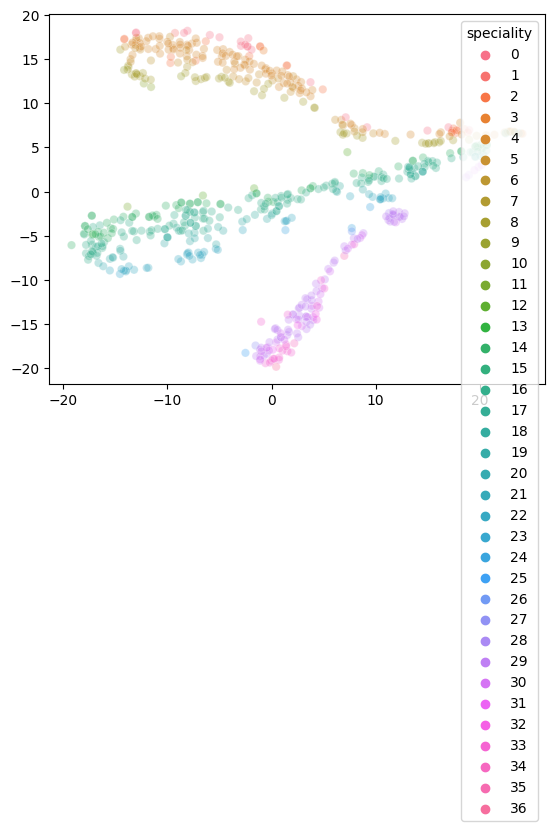

In [116]:

embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['speciality'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['speciality']).shape[0]),
    legend="full",
    alpha=0.3)

<AxesSubplot:>

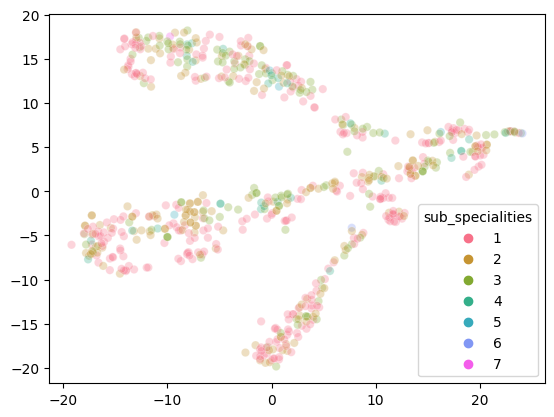

In [117]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['sub_specialities'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['sub_specialities']).shape[0]),
    legend="full",
    alpha=0.3)

<AxesSubplot:>

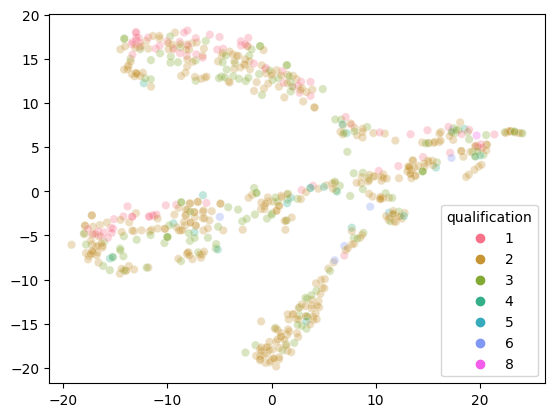

In [118]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['qualification'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['qualification']).shape[0]),
    legend="full",
    alpha=0.3)

<AxesSubplot:>

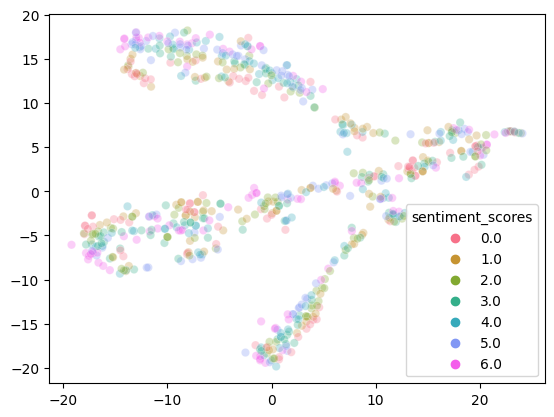

In [119]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['sentiment_scores'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['sentiment_scores']).shape[0]),
    legend="full",
    alpha=0.3)

<AxesSubplot:>

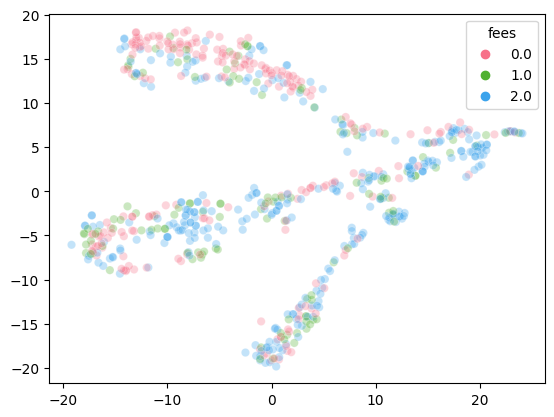

In [120]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['fees'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['fees']).shape[0]),
    legend="full",
    alpha=0.3)

<AxesSubplot:>

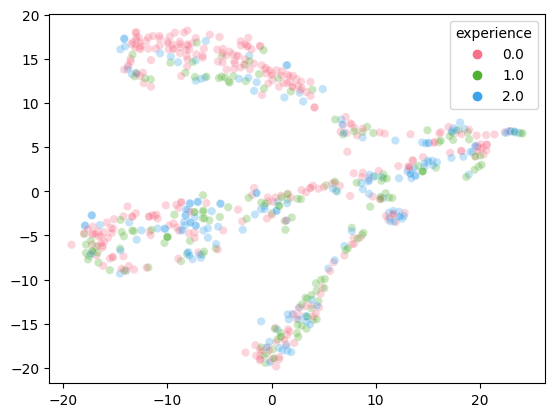

In [121]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['experience'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['experience']).shape[0]),
    legend="full",
    alpha=0.3)

<AxesSubplot:>

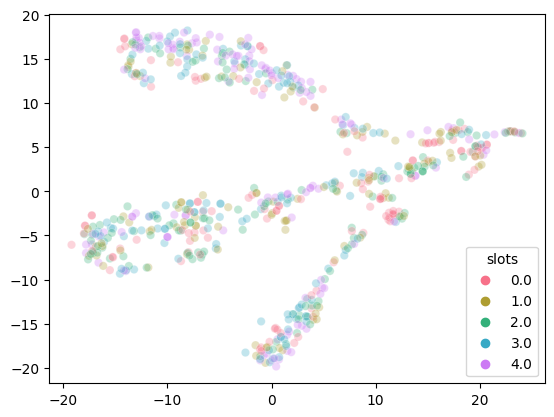

In [122]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=cleaned_data['slots'],
    palette=sns.color_palette('husl',n_colors=np.unique(cleaned_data['slots']).shape[0]),
    legend="full",
    alpha=0.3)

In [109]:
Kbinenc = KBinsDiscretizer(n_bins=7, encode="ordinal")
for column in cleaned_data.columns:
    # print(more_than_50k[column].dtype)
    if column=='sentiment_scores':
        temp = np.array(cleaned_data[column])
        temp=temp.reshape(-1,1)
        cleaned_data[column] = Kbinenc.fit_transform(temp)  
Kbinenc.bin_edges_

array([array([-0.9204    ,  0.28002857,  0.48773393,  0.58846032,  0.67050476,
               0.742775  ,  0.82939286,  0.9947    ])                         ],
      dtype=object)

In [110]:
Kbinenc = KBinsDiscretizer(n_bins=3, encode="ordinal")
for column in cleaned_data.columns:
    # print(more_than_50k[column].dtype)
    if column=='fees':
        temp = np.array(cleaned_data[column])
        temp=temp.reshape(-1,1)
        cleaned_data[column] = Kbinenc.fit_transform(temp)  
Kbinenc.bin_edges_

array([array([   0.        ,  616.66666667, 1000.        , 3000.        ])],
      dtype=object)

In [111]:
Kbinenc = KBinsDiscretizer(n_bins=4, encode="ordinal")
for column in cleaned_data.columns:
    # print(more_than_50k[column].dtype)
    if column=='experience':
        temp = np.array(cleaned_data[column])
        temp=temp.reshape(-1,1)
        cleaned_data[column] = Kbinenc.fit_transform(temp)  
Kbinenc.bin_edges_

c:\Python310\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


array([array([ 0.,  9., 21., 55.])], dtype=object)

In [112]:
Kbinenc = KBinsDiscretizer(n_bins=6, encode="ordinal")
for column in cleaned_data.columns:
    # print(more_than_50k[column].dtype)
    if column=='response_count':
        temp = np.array(cleaned_data[column])
        temp=temp.reshape(-1,1)
        cleaned_data[column] = Kbinenc.fit_transform(temp)  
Kbinenc.bin_edges_

array([array([1.00000000e+00, 3.00000000e+00, 8.00000000e+00, 1.50000000e+01,
              3.60000000e+01, 9.88333333e+01, 2.95700000e+03])               ],
      dtype=object)

In [113]:
Kbinenc = Binarizer(threshold=75)
for column in cleaned_data.columns:
    # print(more_than_50k[column].dtype)
    if column=='recommendation_percent':
        temp = np.array(cleaned_data[column])
        temp=temp.reshape(-1,1)
        cleaned_data[column] = Kbinenc.fit_transform(temp)  


In [114]:
Kbinenc = KBinsDiscretizer(n_bins=5, encode="ordinal")
for column in cleaned_data.columns:
    # print(more_than_50k[column].dtype)
    if column=='slots':
        temp = np.array(cleaned_data[column])
        temp=temp.reshape(-1,1)
        cleaned_data[column] = Kbinenc.fit_transform(temp)  
Kbinenc.bin_edges_

array([array([  0.75      ,  10.        ,  18.        ,  28.5       ,
               46.        , 132.88333333])                           ],
      dtype=object)

In [115]:
cleaned_data

speciality qualification  experience  recommendation_percent  \
0            33             2         1.0                       1   
1            19             4         0.0                       1   
2             4             2         1.0                       1   
3             5             3         0.0                       1   
4            17             2         2.0                       0   
..          ...           ...         ...                     ...   
651          29             2         0.0                       1   
652          16             2         1.0                       1   
653          16             2         0.0                       1   
654          22             2         0.0                       1   
655           5             3         1.0                       1   

     response_count  slots  fees services sub_specialities memberships  \
0               0.0    1.0   2.0        0                2           0   
1               3.0    2.0   2.0        0                1           0   
2               5.0    2.0   0.0       12                2           2   
3               1.0    2.0   1.0        0                1           0   
4               2.0    1.0   2.0       48                1           2   
..              ...    ...   ...      ...              ...         ...   
651             0.0    3.0   0.0        7                1           0   
652             3.0    3.0   0.0        5                4           0   
653             4.0    4.0   2.0       76                2           0   
654             1.0    0.0   2.0       41                1           0   
655             5.0    0.0   2.0       31                1           2   

    registrations  sentiment_scores  
0               1               6.0  
1               1               3.0  
2               1               4.0  
3               1               1.0  
4               1               0.0  
..            ...               ...  
651             1               4.0  
652             1               4.0  
653             1               2.0  
654             1               5.0  
655             1               0.0  

[656 rows x 12 columns]

In [126]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(cleaned_data)
kmeans_labels = kmeans.predict(cleaned_data)

cluster_centers=kmeans.cluster_centers_

<AxesSubplot:>

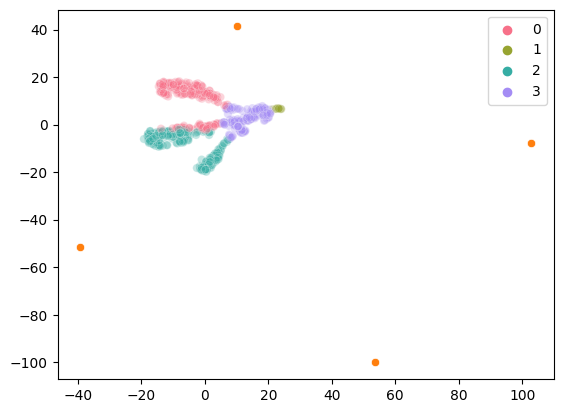

In [132]:
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=kmeans_labels,
    palette=sns.color_palette('husl',n_colors=np.unique(kmeans_labels).shape[0]),
    legend="full",
    alpha=0.3)

cluster_centers_embedded= TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=3,random_state=1).fit_transform(cluster_centers)
sns.scatterplot(x=cluster_centers_embedded[:,0], y=cluster_centers_embedded[:,1],)

<AxesSubplot:>

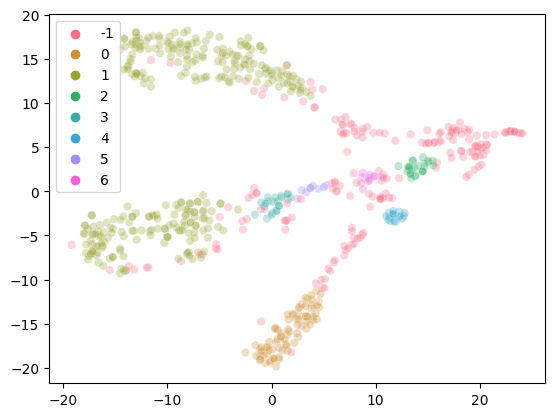

In [141]:
DBSCAN_labels = DBSCAN(eps=5, min_samples=10,n_jobs=-1).fit_predict(cleaned_data)
embedded_data = TSNE(n_components=2,n_jobs=-1, learning_rate='auto',
                  init='random', perplexity=50,random_state=1).fit_transform(cleaned_data)
sns.scatterplot(
    x=embedded_data[:,0], y=embedded_data[:,1],
    hue=DBSCAN_labels,
    palette=sns.color_palette('husl',n_colors=np.unique(DBSCAN_labels).shape[0]),
    legend="full",
    alpha=0.3)
